# NCAA 2023-2024 Foul Analysis and Trends

![Image](https://cdn1.thecomeback.com/wp-content/uploads/sites/94/2024/03/ncaa-wbb-ratings-832x447.jpg)

Before we start, we want to import some preliminary packages

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

We want to read in our play by play data aquired from https://wehoop.sportsdataverse.org/

The R package has functions to access live play by play and box score data from ESPN with shot locations when available.

A scraping and aggregating interface for ESPN’s women’s college basketball and WNBA statistics. It provides users with the capability to access the API’s game play-by-plays, box scores, standings and results to analyze the data for themselves.

In [6]:
ncaa = pd.read_csv('../data/playbyplay/ncaa.csv')
ncaa.head()

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_qtr,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id
0,1,4.016376e+17,101899901,615,Jumpball,Jump Ball won by South Carolina,0,0,1,1st Quarter,...,NaN,NaN,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
1,2,4.016376e+17,101905501,572,LayUpShot,Chloe Kitts missed Layup.,0,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,22.0,1.0,40.75,3.0,NaN
2,3,4.016376e+17,101905502,587,Defensive Rebound,Kate Martin Defensive Rebound.,0,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
3,4,4.016376e+17,101906101,558,JumpShot,Kate Martin made Three Point Jumper. Assisted ...,3,0,1,1st Quarter,...,1.0,1.0,4898389.0,2024-04-07,2024-04-07 15:00:00,15.0,23.0,-18.75,-10.0,NaN
4,5,4.016376e+17,101907901,558,JumpShot,Raven Johnson missed Jumper.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,19.0,6.0,35.75,6.0,NaN


Let's take a look at all the columns in the dataset.

In [8]:
ncaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908679 entries, 0 to 1908678
Data columns (total 61 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   game_play_number                 int64  
 1   id                               float64
 2   sequence_number                  int64  
 3   type_id                          int64  
 4   type_text                        object 
 5   text                             object 
 6   away_score                       int64  
 7   home_score                       int64  
 8   period_number                    int64  
 9   period_display_value             object 
 10  clock_display_value              object 
 11  scoring_play                     bool   
 12  score_value                      int64  
 13  team_id                          float64
 14  athlete_id_1                     float64
 15  wallclock                        object 
 16  shooting_play                    bool   
 17  game_id 

In [9]:
ncaa['game_date'].value_counts()

game_date
2023-11-06    50866
2024-03-02    41509
2024-01-27    40433
2024-01-06    39837
2024-02-24    38956
              ...  
2024-03-31      698
2024-04-05      639
2024-04-07      360
2024-03-27      348
2024-04-06      331
Name: count, Length: 146, dtype: int64

## What are the most common types of plays represented in the data?

In [11]:
ncaa['type_text'].value_counts()

type_text
JumpShot              427608
Defensive Rebound     293368
LayUpShot             250960
PersonalFoul          192322
MadeFreeThrow         188762
Lost Ball Turnover    183859
Offensive Rebound     151143
Steal                  89517
Block Shot             36019
OfficialTVTimeOut      24582
ShortTimeOut           23750
End Period             22323
Dead Ball Rebound      13077
End Game                5229
RegularTimeOut          3526
Jumpball                1535
Technical Foul           772
TipShot                  249
DunkShot                  78
Name: count, dtype: int64

We will want to filter the table down to just look at plays that involve fouls, either Personal Fouls or Technical Fouls

In [13]:
ncaa_fouls = ncaa[ncaa['type_text'].isin(['PersonalFoul','Technical Foul'])]
ncaa_fouls.head()

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_qtr,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id
22,23,4.016376e+17,101929501,519,PersonalFoul,Foul on Bree Hall.,10,2,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
35,36,4.016376e+17,101946501,519,PersonalFoul,Foul on Chloe Kitts.,18,9,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
44,45,4.016376e+17,101949501,519,PersonalFoul,Foul on Addison O'Grady.,20,9,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
47,48,4.016376e+17,101955401,519,PersonalFoul,Foul on Sydney Affolter.,20,9,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
55,56,4.016376e+17,101965301,519,PersonalFoul,Foul on Ashlyn Watkins.,20,13,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN


In order to look at overall team foul counts, we need to match the team_id, which is related to the foul, to match either the home_team_name or away_team_name

In [15]:
team_names = []

for index, row in ncaa_fouls.iterrows():
    if row['team_id'] == row['home_team_id']:
        team_names.append(row['home_team_name'])
    elif row['team_id'] == row['away_team_id']:
        team_names.append(row['away_team_name'])

ncaa_fouls['team_id_name'] = team_names

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_52764/4077331367.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_fouls['team_id_name'] = team_names


In [16]:
ncaa_fouls.head(3)

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id,team_id_name
22,23,4.016376e+17,101929501,519,PersonalFoul,Foul on Bree Hall.,10,2,1,1st Quarter,...,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN,South Carolina
35,36,4.016376e+17,101946501,519,PersonalFoul,Foul on Chloe Kitts.,18,9,1,1st Quarter,...,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN,South Carolina
44,45,4.016376e+17,101949501,519,PersonalFoul,Foul on Addison O'Grady.,20,9,1,1st Quarter,...,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN,Iowa


In [17]:
ncaa_fouls[['type_text','text','team_id','home_team_id','home_team_name','away_team_id','away_team_name']]

,type_text,text,team_id,home_team_id,home_team_name,away_team_id,away_team_name
22,PersonalFoul,Foul on Bree Hall.,2579.0,2579,South Carolina,2294,Iowa
35,PersonalFoul,Foul on Chloe Kitts.,2579.0,2579,South Carolina,2294,Iowa
44,PersonalFoul,Foul on Addison O'Grady.,2294.0,2579,South Carolina,2294,Iowa
47,PersonalFoul,Foul on Sydney Affolter.,2294.0,2579,South Carolina,2294,Iowa
55,PersonalFoul,Foul on Ashlyn Watkins.,2579.0,2579,South Carolina,2294,Iowa
...,...,...,...,...,...,...,...
1908644,PersonalFoul,Foul on Ary Dizon.,2934.0,25,California,2934,Cal State Bakersfield
1908647,PersonalFoul,Foul on Kemery Martin.,25.0,25,California,2934,Cal State Bakersfield
1908651,PersonalFoul,Foul on Ary Dizon.,2934.0,25,California,2934,Cal State Bakersfield
1908662,PersonalFoul,Foul on Lulu Laditan-Twidale.,25.0,25,California,2934,Cal State Bakersfield


## Who are the top foulers within data set?

Since the text includes the play type and player's name, we want to strip the player's name from the text for the count and remove the period.

In [40]:
def get_player_name(text):
    if 'Foul on' in text:
        return text.split('Foul on ')[1].split('.')[0].strip()
    else:
        return None
        
ncaa_fouls['player_name'] = ncaa_fouls['text'].apply(get_player_name)
ncaa_fouls['player_name']

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_52764/2103117940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_fouls['player_name'] = ncaa_fouls['text'].apply(get_player_name)


22                    Bree Hall
35                  Chloe Kitts
44              Addison O'Grady
47              Sydney Affolter
55               Ashlyn Watkins
                   ...         
1908644               Ary Dizon
1908647           Kemery Martin
1908651               Ary Dizon
1908662    Lulu Laditan-Twidale
1908670          Morgan Edwards
Name: player_name, Length: 193094, dtype: object

In [42]:
technical_fouls = ncaa_fouls[ncaa_fouls['type_text'] == 'Technical Foul']
personal_fouls = ncaa_fouls[ncaa_fouls['type_text'] == 'PersonalFoul']

In [44]:
top_personal_foul_players = personal_fouls['player_name'].value_counts()
top_personal_foul_players

player_name
Jada Williams        141
Kennedy Calhoun      136
Breya Cunningham     129
Ugonne Onyiah        118
Emani Burks          117
                    ... 
Maddie Guler           1
Greta Tollefson        1
Jordyn Kahler          1
Laura Ortega-Mora      1
Tailyn Black           1
Name: count, Length: 6742, dtype: int64

In [46]:
top_personal_foul_teams = personal_fouls['team_id_name'].value_counts()
top_personal_foul_teams.head()

team_id_name
Niagara               750
Saint Louis           706
Kansas City           697
North Dakota State    654
Texas                 653
Name: count, dtype: int64

In [48]:
top_technical_foul_players = technical_fouls['team_id_name'].value_counts()
top_technical_foul_players

team_id_name
Georgia Southern    12
Hampton             11
Old Dominion         9
UCF                  8
South Alabama        8
                    ..
Murray State         1
Georgetown           1
Santa Clara          1
Kansas State         1
Florida National     1
Name: count, Length: 290, dtype: int64

In [50]:
top_technical_foul_teams = technical_fouls['team_id_name'].value_counts()
top_technical_foul_teams

team_id_name
Georgia Southern    12
Hampton             11
Old Dominion         9
UCF                  8
South Alabama        8
                    ..
Murray State         1
Georgetown           1
Santa Clara          1
Kansas State         1
Florida National     1
Name: count, Length: 290, dtype: int64

We want to focus on the Power Five Conferences (ACC, Big Ten, Big 12, Pac-12, SEC), so we will want to filter by conference. We can then use this to see if a particular conference had a higher amount of fouls in the 2023-2024 season.  However, that information is not in the dataset. We can create a map dictionary and apply it to a new column.

In [56]:
sorted(ncaa_fouls['team_id_name'].unique())

['Abilene Christian',
 'Academy of Art',
 'Adelphi',
 'Agnes Scott College',
 'Air Force',
 'Akron',
 'Alabama',
 'Alabama A&M',
 'Alabama State',
 'Alabama-Huntsville',
 'Alaska',
 'Alaska Anchorage',
 'Albany St (GA)',
 'Alcorn State',
 'Allen University',
 'American University',
 'Anderson (SC)',
 'Angelo State',
 'Antelope Valley',
 'Appalachian State',
 'Apprentice School',
 'Aquinas',
 'Arcadia University',
 'Arizona',
 'Arizona Christian',
 'Arizona State',
 'Arkansas',
 'Arkansas Baptist',
 'Arkansas State',
 'Arkansas-Pine Bluff',
 'Arlington Baptist',
 'Army',
 'Asbury',
 'Auburn',
 'Auburn-Montgomery',
 'Austin Peay',
 'Ave Maria',
 'Averett',
 'BYU',
 'Ball State',
 'Baylor',
 'Bellarmine',
 'Bellevue University',
 'Belmont',
 'Berry',
 'Bethesda University',
 'Bethune-Cookman',
 'Binghamton',
 'Biola',
 'Bloomfield',
 'Bloomsburg',
 'Bob Jones',
 'Boise State',
 'Boston College',
 'Boston University',
 'Bowie State',
 'Bowling Green',
 'Bradley',
 'Brescia',
 'Brevard',
 '

In [58]:
conference_mapping = {
    'Boston College': 'ACC', 'Clemson': 'ACC', 'Duke': 'ACC', 'Florida State': 'ACC', 
    'Georgia Tech': 'ACC', 'Louisville': 'ACC', 'Miami': 'ACC', 'North Carolina': 'ACC', 
    'NC State': 'ACC', 'Notre Dame': 'ACC', 'Pittsburgh': 'ACC', 'Syracuse': 'ACC', 
    'Virginia': 'ACC', 'Virginia Tech': 'ACC', 'Wake Forest': 'ACC',
    
    'Illinois': 'Big Ten', 'Indiana': 'Big Ten', 'Iowa': 'Big Ten', 'Maryland': 'Big Ten', 
    'Michigan': 'Big Ten', 'Michigan State': 'Big Ten', 'Minnesota': 'Big Ten', 
    'Nebraska': 'Big Ten', 'Northwestern': 'Big Ten', 'Ohio State': 'Big Ten', 
    'Penn State': 'Big Ten', 'Purdue': 'Big Ten', 'Rutgers': 'Big Ten', 'Wisconsin': 'Big Ten',

    'Baylor': 'Big 12', 'BYU': 'Big 12', 'Cincinnati': 'Big 12', 'Iowa State': 'Big 12', 
    'Kansas': 'Big 12', 'Kansas State': 'Big 12', 'Oklahoma': 'Big 12', 'Oklahoma State': 'Big 12', 
    'TCU': 'Big 12', 'Texas': 'Big 12', 'Texas Tech': 'Big 12', 'UCF': 'Big 12', 
    'West Virginia': 'Big 12', 'Houston': 'Big 12',

    'Arizona': 'Pac-12', 'Arizona State': 'Pac-12', 'California': 'Pac-12', 'Colorado': 'Pac-12', 
    'Oregon': 'Pac-12', 'Oregon State': 'Pac-12', 'Stanford': 'Pac-12', 'UCLA': 'Pac-12', 
    'USC': 'Pac-12', 'Utah': 'Pac-12', 'Washington': 'Pac-12', 'Washington State': 'Pac-12',

    'Alabama': 'SEC', 'Arkansas': 'SEC', 'Auburn': 'SEC', 'Florida': 'SEC', 'Georgia': 'SEC', 
    'Kentucky': 'SEC', 'LSU': 'SEC', 'Mississippi State': 'SEC', 'Missouri': 'SEC', 
    'Ole Miss': 'SEC', 'South Carolina': 'SEC', 'Tennessee': 'SEC', 'Texas A&M': 'SEC', 
    'Vanderbilt': 'SEC'
}

In [60]:
ncaa_fouls['team_conference'] = ncaa_fouls['team_id_name'].map(conference_mapping)

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_52764/3879267565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_fouls['team_conference'] = ncaa_fouls['team_id_name'].map(conference_mapping)


In [62]:
ncaa_fouls['team_conference'].value_counts()

team_conference
ACC        7771
Big 12     7636
Big Ten    7604
SEC        7298
Pac-12     6153
Name: count, dtype: int64

In [64]:
ncaa_fouls.to_csv('ncaa_fouls.csv', index=False)

## What type of play happens most frequently BEFORE a foul occurs?

We now want to do more predictive analysis. We can grab every line above lines that contain foul plays and do a count in order to see the fequency of play types that occur before fouls. 
#https://stackoverflow.com/questions/65041993/how-to-select-the-actual-row-and-the-above-based-on-specific-string-in-pandas

In [67]:
foul_types = ncaa['type_text'].eq('PersonalFoul') | ncaa['type_text'].eq('TechnicalFoul')
play_before_fouls = ncaa.loc[foul_types | foul_types.shift(-1)]
play_before_fouls_count= play_before_fouls['type_text'].value_counts().reset_index()
play_before_fouls_count.to_csv('play_before_fouls', index=False)

In [69]:
play_before_personal = ncaa.loc[ncaa['type_text'].eq('PersonalFoul')|ncaa['type_text'].eq('PersonalFoul').shift(-1)]
play_before_personal['type_text'].value_counts()

type_text
PersonalFoul          192322
Defensive Rebound      52616
LayUpShot              30749
Offensive Rebound      25186
JumpShot               23799
Steal                  15141
Lost Ball Turnover     12790
MadeFreeThrow          11476
ShortTimeOut            3597
OfficialTVTimeOut       2727
End Period              2061
Dead Ball Rebound        950
RegularTimeOut           811
End Game                 301
Block Shot               266
Jumpball                 151
TipShot                   41
Technical Foul            20
DunkShot                  12
Name: count, dtype: int64

In [71]:
play_before_technical = ncaa.loc[ncaa['type_text'].eq('Technical Foul')|ncaa['type_text'].eq('Technical Foul').shift(-1)]
play_before_technical['type_text'].value_counts()

type_text
Technical Foul        772
PersonalFoul          159
Lost Ball Turnover    106
MadeFreeThrow          98
Defensive Rebound      91
JumpShot               55
Offensive Rebound      49
LayUpShot              46
Steal                  29
OfficialTVTimeOut      28
End Game               20
End Period             11
ShortTimeOut           10
Dead Ball Rebound       4
RegularTimeOut          1
Block Shot              1
Name: count, dtype: int64

## When do fouls occur most frequently? Time intervals, quarters, or by possession

We can utilize the columns that contain time information to see at what points in the game that fouls most frequently occur.

In [73]:
timeline = ncaa_fouls.groupby(['type_text', 'period_display_value']).size().reset_index(name='count')
timeline

,type_text,period_display_value,count
0,PersonalFoul,1st Quarter,36745
1,PersonalFoul,2OT,205
2,PersonalFoul,2nd Quarter,44057
3,PersonalFoul,3OT,35
4,PersonalFoul,3rd Quarter,50135
5,PersonalFoul,4OT,18
6,PersonalFoul,4th Quarter,59869
7,PersonalFoul,OT,1258
8,Technical Foul,1st Quarter,77
9,Technical Foul,2nd Quarter,144


Instead of counts, let's try to grab percentages to show the frequency.

In [76]:
timeline['total_fouls'] = timeline.groupby('type_text')['count'].transform('sum')
timeline['percentage'] = (timeline['count'] / timeline['total_fouls']) * 100
timeline

,type_text,period_display_value,count,total_fouls,percentage
0,PersonalFoul,1st Quarter,36745,192322,19.105979
1,PersonalFoul,2OT,205,192322,0.106592
2,PersonalFoul,2nd Quarter,44057,192322,22.907936
3,PersonalFoul,3OT,35,192322,0.018199
4,PersonalFoul,3rd Quarter,50135,192322,26.068261
5,PersonalFoul,4OT,18,192322,0.009359
6,PersonalFoul,4th Quarter,59869,192322,31.129564
7,PersonalFoul,OT,1258,192322,0.654111
8,Technical Foul,1st Quarter,77,772,9.974093
9,Technical Foul,2nd Quarter,144,772,18.652850


Reorder the the way the quarters are displayed.

In [80]:
sorted_quarters = ['1st Quarter', '2nd Quarter', '3rd Quarter', '4th Quarter', 'OT', '2OT', '3OT', '4OT']
timeline['period_display_value'] = pd.Categorical(timeline['period_display_value'], sorted_quarters)
timeline = timeline.sort_values('period_display_value')
timeline

,type_text,period_display_value,count,total_fouls,percentage
0,PersonalFoul,1st Quarter,36745,192322,19.105979
8,Technical Foul,1st Quarter,77,772,9.974093
2,PersonalFoul,2nd Quarter,44057,192322,22.907936
9,Technical Foul,2nd Quarter,144,772,18.652850
4,PersonalFoul,3rd Quarter,50135,192322,26.068261
10,Technical Foul,3rd Quarter,229,772,29.663212
6,PersonalFoul,4th Quarter,59869,192322,31.129564
11,Technical Foul,4th Quarter,312,772,40.414508
7,PersonalFoul,OT,1258,192322,0.654111
12,Technical Foul,OT,10,772,1.295337


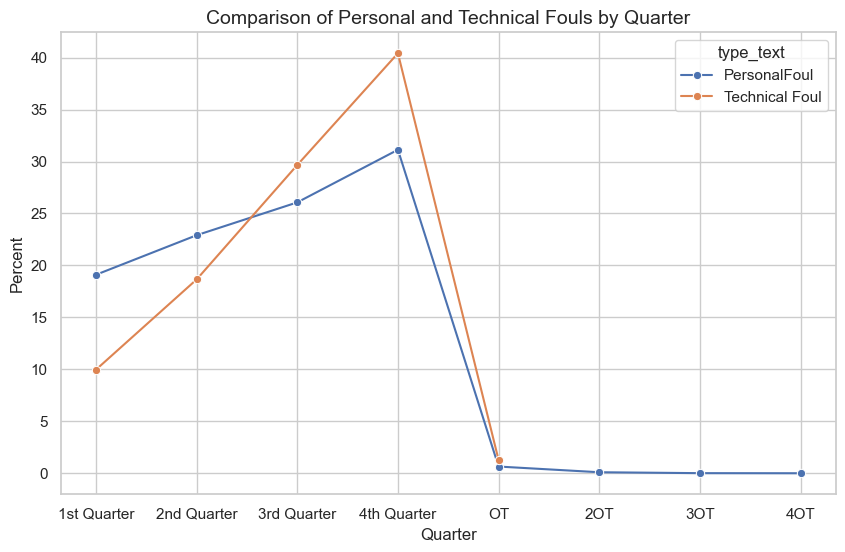

In [82]:
# Set Seaborn theme for better visuals
sns.set(style="whitegrid")

# Plot the line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=timeline, x='period_display_value', y='percentage', hue='type_text', marker='o')

# Adding labels and title
plt.title('Comparison of Personal and Technical Fouls by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Percent', fontsize=12)

# Show the plot
plt.show()

In [84]:
season_timeline = ncaa_fouls.groupby('game_date')['type_text'].value_counts().reset_index()
season_timeline

,game_date,type_text,count
0,2023-11-06,PersonalFoul,5186
1,2023-11-06,Technical Foul,10
2,2023-11-07,PersonalFoul,1051
3,2023-11-07,Technical Foul,4
4,2023-11-08,PersonalFoul,1025
...,...,...,...
267,2024-04-03,PersonalFoul,77
268,2024-04-03,Technical Foul,1
269,2024-04-05,PersonalFoul,52
270,2024-04-06,PersonalFoul,28


Are there any patterns as the season progresses? We can utilizie the game_date and filter by month to answer this question.

In [86]:
season_timeline['game_date'] = pd.to_datetime(season_timeline['game_date'])
season_timeline['month_name'] = season_timeline['game_date'].dt.month_name()
season_timeline

,game_date,type_text,count,month_name
0,2023-11-06,PersonalFoul,5186,November
1,2023-11-06,Technical Foul,10,November
2,2023-11-07,PersonalFoul,1051,November
3,2023-11-07,Technical Foul,4,November
4,2023-11-08,PersonalFoul,1025,November
...,...,...,...,...
267,2024-04-03,PersonalFoul,77,April
268,2024-04-03,Technical Foul,1,April
269,2024-04-05,PersonalFoul,52,April
270,2024-04-06,PersonalFoul,28,April


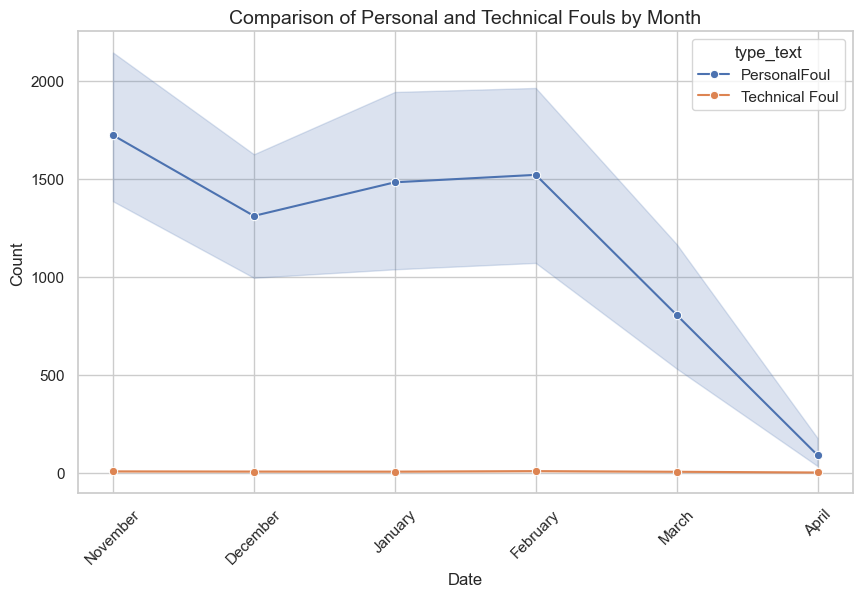

In [88]:
# Set Seaborn theme for better visuals
sns.set(style="whitegrid")

# Plot the line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_timeline, x='month_name', y='count', hue='type_text', marker='o')

# Adding labels and title
plt.title('Comparison of Personal and Technical Fouls by Month', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

Are there any patterns based on how much time is on the clock?

In [91]:
ncaa_fouls[['time',
    'clock_minutes',
    'clock_seconds',
    'home_timeout_called',
    'away_timeout_called',
    'half',
    'game_half',
    'lead_qtr',
    'lead_half',
    'start_quarter_seconds_remaining',
    'start_half_seconds_remaining',
    'start_game_seconds_remaining',
    'end_quarter_seconds_remaining',
    'end_half_seconds_remaining',
    'end_game_seconds_remaining',
    'period']]

,time,clock_minutes,clock_seconds,home_timeout_called,away_timeout_called,half,game_half,lead_qtr,lead_half,start_quarter_seconds_remaining,start_half_seconds_remaining,start_game_seconds_remaining,end_quarter_seconds_remaining,end_half_seconds_remaining,end_game_seconds_remaining,period
22,7:04,7,4,False,False,1,1,1.0,1.0,424,1024,2224,424.0,1024.0,2224.0,1
35,5:34,5,34,False,False,1,1,1.0,1.0,334,934,2134,334.0,934.0,2134.0,1
44,5:04,5,4,False,False,1,1,1.0,1.0,304,904,2104,291.0,891.0,2091.0,1
47,4:45,4,45,False,False,1,1,1.0,1.0,285,885,2085,285.0,885.0,2085.0,1
55,3:46,3,46,False,False,1,1,1.0,1.0,226,826,2026,226.0,826.0,2026.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908644,4:31,4,31,False,False,2,2,4.0,2.0,271,271,271,271.0,271.0,271.0,4
1908647,4:11,4,11,False,False,2,2,4.0,2.0,251,251,251,251.0,251.0,251.0,4
1908651,3:58,3,58,False,False,2,2,4.0,2.0,238,238,238,238.0,238.0,238.0,4
1908662,2:25,2,25,False,False,2,2,4.0,2.0,145,145,145,130.0,130.0,130.0,4


In [94]:
foul_data = ncaa_fouls.groupby('end_game_seconds_remaining').size().reset_index(name='foul_count')
total_games = ncaa_fouls['id'].nunique()  
total_seconds_per_game = 48 * 60 
foul_data['foul_rate_per_second'] = foul_data['foul_count'] / total_games

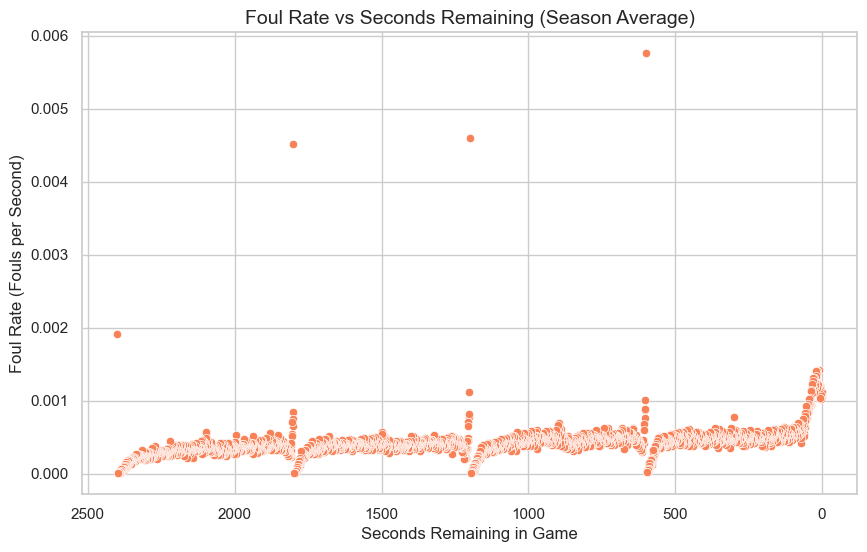

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='end_game_seconds_remaining', y='foul_rate_per_second', data=foul_data, color = '#F88158')

plt.title('Foul Rate vs Seconds Remaining (Season Average)', fontsize=14)
plt.xlabel('Seconds Remaining in Game', fontsize=12)
plt.ylabel('Foul Rate (Fouls per Second)', fontsize=12)
plt.gca().invert_xaxis() #Puts x-axis in decending order

# Show the plot
plt.show()

It is interesting to see tha the foul rate follows a similar pattern across the quarters. It appears the end of the game has the largest number of fouls. We should take a closer look at that.

In [109]:
last_seconds = foul_data[foul_data['end_game_seconds_remaining'] < 200]

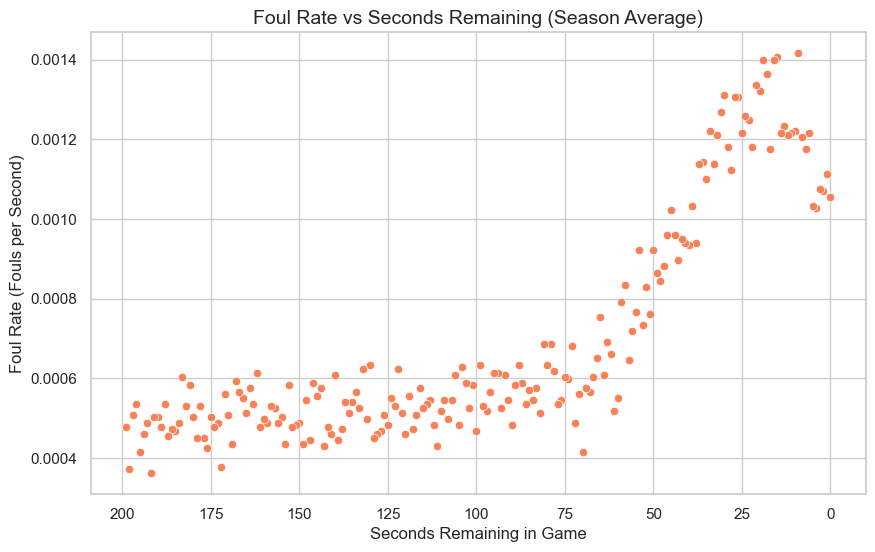

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='end_game_seconds_remaining', y='foul_rate_per_second', data=last_seconds, color = '#F88158')

# Adding labels and title
plt.title('Foul Rate vs Seconds Remaining (Season Average)', fontsize=14)
plt.xlabel('Seconds Remaining in Game', fontsize=12)
plt.ylabel('Foul Rate (Fouls per Second)', fontsize=12)
plt.gca().invert_xaxis() #Puts x-axis in decending order

# Show the plot
plt.show()

In [111]:
last_game = ncaa[ncaa['game_date_time'] == '2024-04-07 15:00:00']	
last_game

,game_play_number,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,...,lag_qtr,lag_half,athlete_id_2,game_date,game_date_time,coordinate_x_raw,coordinate_y_raw,coordinate_x,coordinate_y,media_id
0,1,4.016376e+17,101899901,615,Jumpball,Jump Ball won by South Carolina,0,0,1,1st Quarter,...,NaN,NaN,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
1,2,4.016376e+17,101905501,572,LayUpShot,Chloe Kitts missed Layup.,0,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,22.0,1.0,40.75,3.0,NaN
2,3,4.016376e+17,101905502,587,Defensive Rebound,Kate Martin Defensive Rebound.,0,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
3,4,4.016376e+17,101906101,558,JumpShot,Kate Martin made Three Point Jumper. Assisted ...,3,0,1,1st Quarter,...,1.0,1.0,4898389.0,2024-04-07,2024-04-07 15:00:00,15.0,23.0,-18.75,-10.0,NaN
4,5,4.016376e+17,101907901,558,JumpShot,Raven Johnson missed Jumper.,3,0,1,1st Quarter,...,1.0,1.0,NaN,2024-04-07,2024-04-07 15:00:00,19.0,6.0,35.75,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,4.016376e+17,104994501,579,ShortTimeOut,Iowa Timeout,75,87,4,4th Quarter,...,4.0,2.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
356,357,4.016376e+17,104994601,598,Lost Ball Turnover,Caitlin Clark Turnover.,75,87,4,4th Quarter,...,4.0,2.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,-41.75,0.0,NaN
357,358,4.016376e+17,104994602,607,Steal,Raven Johnson Steal.,75,87,4,4th Quarter,...,4.0,2.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN
358,359,4.016376e+17,104997801,598,Lost Ball Turnover,South Carolina Turnover.,75,87,4,4th Quarter,...,4.0,2.0,NaN,2024-04-07,2024-04-07 15:00:00,25.0,0.0,41.75,0.0,NaN


In [113]:
last_game.to_csv('last_game.csv', index=False)

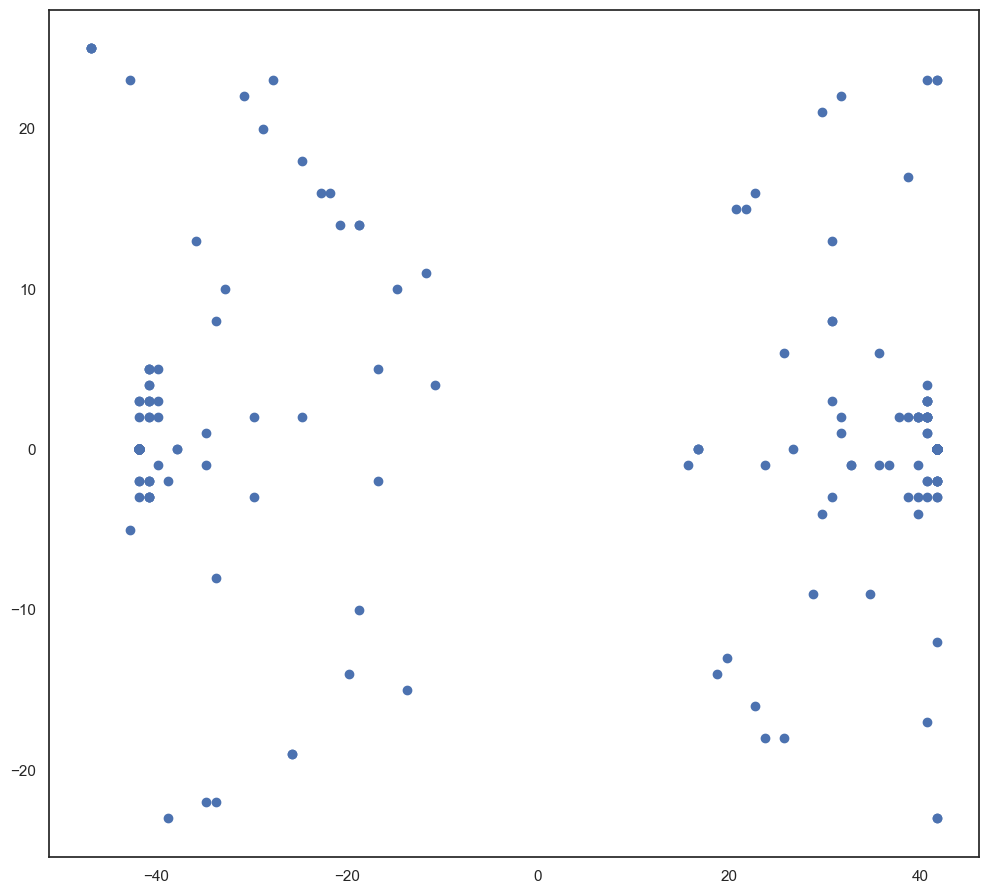

In [115]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(last_game.coordinate_x, last_game.coordinate_y)
plt.show()

https://www.thedataschool.com.au/joshua-verbeek/how-to-plot-a-basketball-shot-chart-using-tableau/